# Phase 5: Model Selection & Training

This notebook focuses on training and evaluating machine learning models for weather condition prediction using the preprocessed environmental sensor data. We'll use Yggdrasil Decision Forests (YDF) for efficient training of decision tree-based models.

## Objectives:
1. Select an appropriate model architecture for weather prediction
2. Train candidate models using YDF learners
3. Evaluate and compare model performance
4. Optimize hyperparameters for best accuracy
5. Train final model for deployment to ESP32-S3

## Dataset Summary:
- **Records**: Preprocessed environmental measurements
- **Features**: Temperature, humidity, pressure, illuminance, and engineered features
- **Target**: Weather condition categories

---

## Section 1: Import Required Libraries

In [1]:
# Import required libraries
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning libraries
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib

# YDF libraries
try:
    import ydf
    from ydf import RandomForestLearner, GradientBoostedTreesLearner
    print(f"✅ YDF version: {ydf.__version__}")
except ImportError:
    print("⚠️ YDF not installed. Installing now...")
    !pip install ydf
    import ydf
    from ydf import RandomForestLearner, GradientBoostedTreesLearner
    print(f"✅ YDF installed successfully. Version: {ydf.__version__}")

# Configure display settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

print(f"📊 Model Training Notebook initialized at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"✓ All training libraries imported successfully")

✅ YDF version: 0.8.0
📊 Model Training Notebook initialized at: 2025-09-15 22:34:36
✓ All training libraries imported successfully


## Section 2: Load Preprocessed Data

In [2]:
# Set project paths
PROJECT_ROOT = Path(r"G:\CSE Weather Model")
DATA_DIR = PROJECT_ROOT / "data"
PROCESSED_DIR = DATA_DIR / "processed"
MODEL_DIR = PROJECT_ROOT / "models"
TRAINED_MODEL_DIR = MODEL_DIR / "trained"
CHECKPOINTS_DIR = MODEL_DIR / "checkpoints"

# Create model directories if they don't exist
TRAINED_MODEL_DIR.mkdir(exist_ok=True, parents=True)
CHECKPOINTS_DIR.mkdir(exist_ok=True, parents=True)

# Load training, validation, and test data
print("📥 Loading preprocessed datasets...")
print("=" * 50)

# Load datasets
train_path = PROCESSED_DIR / "train_data.csv"
val_path = PROCESSED_DIR / "validation_data.csv"
test_path = PROCESSED_DIR / "test_data.csv"

train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

print(f"✓ Training data loaded: {len(train_df):,} records")
print(f"✓ Validation data loaded: {len(val_df):,} records")
print(f"✓ Test data loaded: {len(test_df):,} records")

# Load label encoder
label_encoder_path = PROCESSED_DIR / "weather_label_encoder.pkl"
label_encoder = joblib.load(label_encoder_path)
print(f"✓ Label encoder loaded successfully")

# Load feature column list
with open(PROCESSED_DIR / "feature_columns.json", 'r') as f:
    feature_cols = json.load(f)
    
print(f"✓ Feature columns loaded: {len(feature_cols)} features")

# Verify weather categories
weather_categories = label_encoder.classes_.tolist()
print(f"✓ Weather categories loaded: {len(weather_categories)} categories")
print(f"  Categories: {', '.join(weather_categories)}")

# Prepare feature and target variables
X_train = train_df[feature_cols]
y_train = train_df['weather_label']

X_val = val_df[feature_cols]
y_val = val_df['weather_label']

X_test = test_df[feature_cols]
y_test = test_df['weather_label']

# Display data sample
print("\n📊 Training Data Sample:")
print(train_df.head(3))

📥 Loading preprocessed datasets...
✓ Training data loaded: 485,254 records
✓ Validation data loaded: 103,983 records
✓ Test data loaded: 103,983 records
✓ Label encoder loaded successfully
✓ Feature columns loaded: 19 features
✓ Weather categories loaded: 4 categories
  Categories: cool, hot_dry, moderate, pleasant

📊 Training Data Sample:
                  time  temperature  humidity  pressure   lux  heat_index  \
0  2022-04-22 20:08:45        0.455     0.308     0.162 0.001       0.498   
1  2022-04-09 14:48:47        0.318     0.337     0.524 0.171       0.348   
2  2022-04-10 23:19:58        0.273     0.391     0.636 0.000       0.299   

   dew_point  comfort_ratio  pressure_trend  hour  day  month  day_of_week  \
0      0.564          0.415           0.505    20   22      4            4   
1      0.478          0.313           0.508    14    9      4            5   
2      0.488          0.235           0.518    23   10      4            6   

   is_weekend  hour_sin  hour_cos  a

## Section 3: Model Selection

In this section, we'll evaluate different YDF learners to select the most appropriate model architecture for our weather prediction task.

🤖 MODEL SELECTION PROCESS

🔧 Initializing YDF learners...

🏃‍♂️ Training Random Forest model...
Train model on 485254 examples
Train model on 485254 examples
Model trained in 0:00:27.553080
Model trained in 0:00:27.553080
✓ Random Forest trained in 28.58s

🏃‍♂️ Training Gradient Boosted Trees model...
✓ Random Forest trained in 28.58s

🏃‍♂️ Training Gradient Boosted Trees model...
Train model on 485254 examples
Train model on 485254 examples
Model trained in 0:03:38.631906
Model trained in 0:03:38.631906
✓ Gradient Boosted Trees trained in 220.13s

📊 Evaluating models on validation set...
✓ Gradient Boosted Trees trained in 220.13s

📊 Evaluating models on validation set...
Debug: y_pred_raw type: <class 'numpy.ndarray'>
Debug: y_pred_raw shape: (103983, 4)
Debug: y_pred_raw dtype: float32
Debug: final y_pred shape: (103983,), dtype: int64
Debug: first 5 predictions: [0 0 0 0 0]
Debug: y_true shape: (103983,), dtype: int64
Debug: first 5 true labels: [3 3 2 2 2]

📊 Random Forest Perform

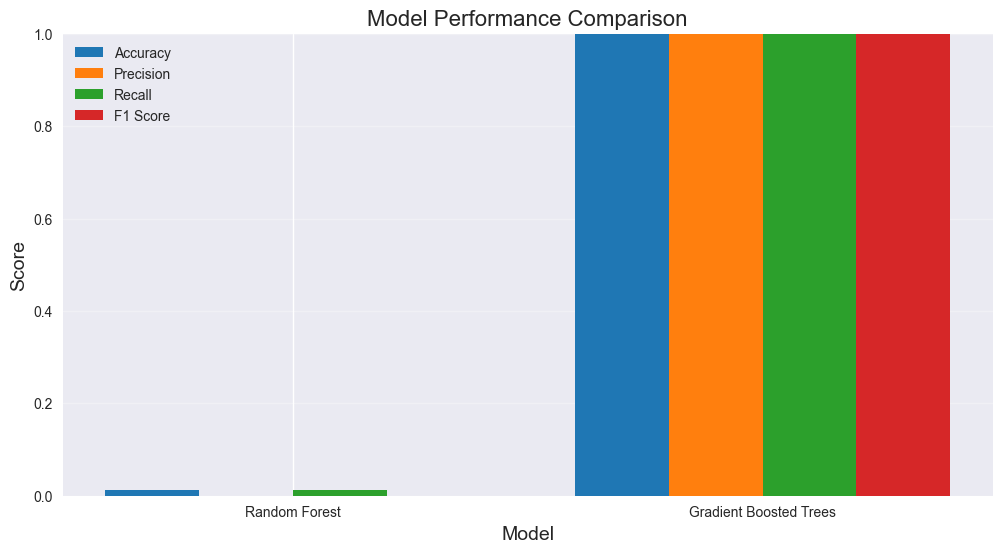


✅ Best model: Gradient Boosted Trees with accuracy 0.9989

📊 Confusion Matrix for the best model:


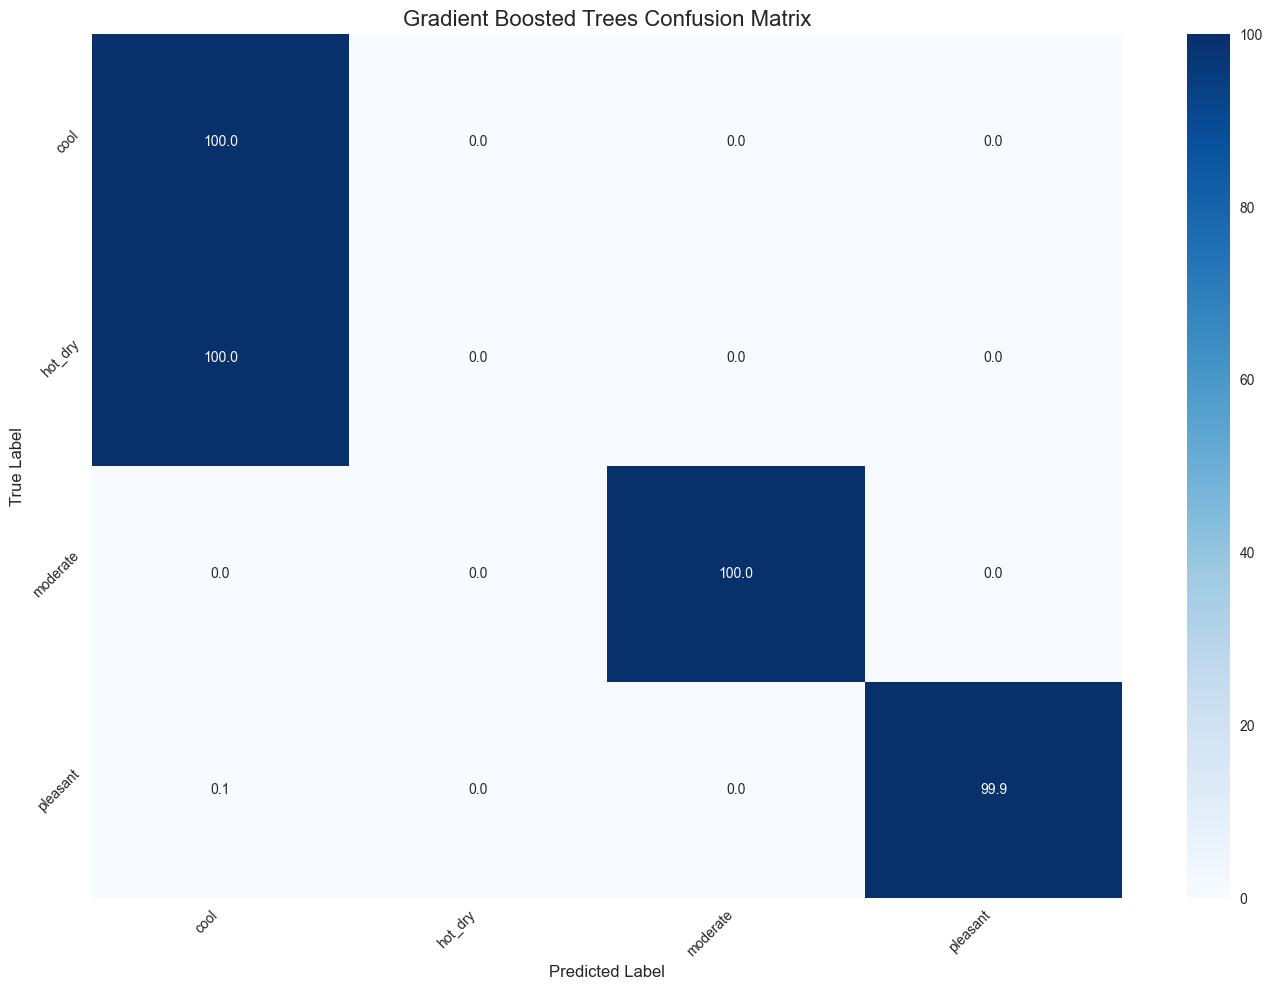


🔍 Variable Importance for best model:
Debug: var_importance type: <class 'dict'>
Debug: var_importance keys: ['NUM_AS_ROOT', 'INV_MEAN_MIN_DEPTH', 'NUM_NODES', 'SUM_SCORE']
Debug: var_importance content: {'NUM_AS_ROOT': [(208.0, 'humidity'), (77.0, 'temperature'), (44.0, 'lux'), (34.0, 'air_density'), (32.0, 'heat_index'), (5.0, 'dew_point')], 'INV_MEAN_MIN_DEPTH': [(0.458903549497389, 'humidity'), (0.25869772316931744, 'temperature'), (0.2540044045517442, 'lux'), (0.2399553824056204, 'air_density'), (0.22218041170669484, 'heat_index'), (0.22195145061055072, 'pressure'), (0.22143317656089773, 'pressure_trend'), (0.21724222655764105, 'dew_point'), (0.20239555533461526, 'absolute_humidity'), (0.1985907911273245, 'comfort_ratio'), (0.18960221263300547, 'hour'), (0.18958963325798164, 'hour_cos'), (0.1895040670813831, 'hour_sin'), (0.18943440696507782, 'light_category'), (0.1894128662727368, 'day'), (0.1894048410436371, 'day_of_week'), (0.1893651559638487, 'is_weekend'), (0.189332919661824

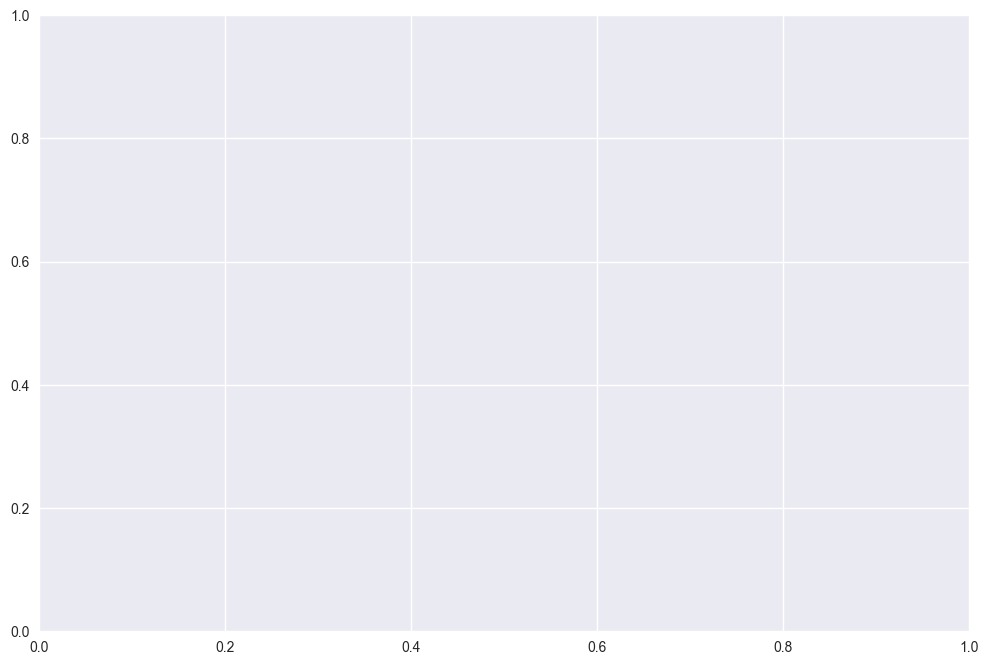

In [3]:
print("🤖 MODEL SELECTION PROCESS")
print("=" * 50)

# Define function to evaluate model performance
def evaluate_model(model, X, y, model_name="Model"):
    """Evaluate a model and return performance metrics.
    
    Args:
        model: Trained YDF model
        X: Feature data
        y: Target labels
        model_name: Name of the model for reporting
        
    Returns:
        Dictionary of performance metrics
    """
    # Create evaluation dataframe with both features and label
    eval_data = X.copy()
    eval_data[label] = y
    
    # Make predictions - need to get the actual predictions as integers
    # YDF might return a different format than sklearn expects
    y_pred_raw = model.predict(eval_data)
    
    # Debug: print the type and shape of predictions
    print(f"Debug: y_pred_raw type: {type(y_pred_raw)}")
    if hasattr(y_pred_raw, 'shape'):
        print(f"Debug: y_pred_raw shape: {y_pred_raw.shape}")
    if hasattr(y_pred_raw, 'dtype'):
        print(f"Debug: y_pred_raw dtype: {y_pred_raw.dtype}")
    
    # Convert predictions to proper format if needed
    # This ensures compatibility with sklearn metrics
    if isinstance(y_pred_raw, dict) and "predictions" in y_pred_raw:
        y_pred = y_pred_raw["predictions"]
    elif hasattr(y_pred_raw, 'values'):  # pandas Series/DataFrame
        y_pred = y_pred_raw.values
    elif hasattr(y_pred_raw, 'astype'):
        y_pred = y_pred_raw.astype(int)
    else:
        y_pred = np.array(y_pred_raw, dtype=int)
    
    # Ensure y_pred is 1D for multiclass classification
    y_pred = np.squeeze(y_pred)  # Remove single-dimensional entries
    if y_pred.ndim > 1:
        # If still multidimensional, take the first column or argmax
        if y_pred.shape[1] > 1:
            y_pred = np.argmax(y_pred, axis=1)
        else:
            y_pred = y_pred.flatten()
    
    # Ensure y_pred is the same length as y_true
    y_pred = np.array(y_pred, dtype=int)
    
    print(f"Debug: final y_pred shape: {y_pred.shape}, dtype: {y_pred.dtype}")
    print(f"Debug: first 5 predictions: {y_pred[:5]}")
    
    # Make sure y is also in the correct format (convert to numpy array of same type)
    y_true = np.array(y, dtype=int)
    if y_true.ndim > 1:
        y_true = np.squeeze(y_true)
    
    print(f"Debug: y_true shape: {y_true.shape}, dtype: {y_true.dtype}")
    print(f"Debug: first 5 true labels: {y_true[:5]}")
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    
    # Print results
    print(f"\n📊 {model_name} Performance:")
    print(f"  • Accuracy: {accuracy:.4f}")
    print(f"  • Precision: {precision:.4f}")
    print(f"  • Recall: {recall:.4f}")
    print(f"  • F1 Score: {f1:.4f}")
    
    # Return metrics
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred
    }

# Create a visualization of confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title="Confusion Matrix"):
    """Plot confusion matrix with seaborn."""
    # Make sure both inputs are numpy arrays of same type
    y_true = np.array(y_true, dtype=int)
    y_pred = np.array(y_pred, dtype=int)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Convert to percentage for better visualization
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Create figure
    plt.figure(figsize=(14, 10))
    
    # Create heatmap
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    
    plt.title(title, fontsize=16)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
# Define the label column name for YDF
label = "weather_label"

# Initialize YDF learners with default parameters
print("\n🔧 Initializing YDF learners...")

# Random Forest learner
rf_learner = RandomForestLearner(
    label=label,                # Target label column name
    num_trees=100,              # Number of trees in the forest
    max_depth=20,               # Maximum depth of trees
    categorical_algorithm="RANDOM",  # Algorithm for categorical features
    random_seed=42,             # Random seed for reproducibility
)

# Gradient Boosted Trees learner
gbt_learner = GradientBoostedTreesLearner(
    label=label,                # Target label column name
    num_trees=100,              # Number of trees
    max_depth=6,                # Maximum depth of trees
    shrinkage=0.1,              # Learning rate
    categorical_algorithm="RANDOM",  # Algorithm for categorical features
    random_seed=42,             # Random seed for reproducibility
)

print("\n🏃‍♂️ Training Random Forest model...")
start_time = datetime.now()
# Create training dataframe with both features and label
train_data = X_train.copy()
train_data[label] = y_train
rf_model = rf_learner.train(train_data)
rf_train_time = (datetime.now() - start_time).total_seconds()
print(f"✓ Random Forest trained in {rf_train_time:.2f}s")

print("\n🏃‍♂️ Training Gradient Boosted Trees model...")
start_time = datetime.now()
gbt_model = gbt_learner.train(train_data)
gbt_train_time = (datetime.now() - start_time).total_seconds()
print(f"✓ Gradient Boosted Trees trained in {gbt_train_time:.2f}s")

# Evaluate models on validation set
print("\n📊 Evaluating models on validation set...")
rf_metrics = evaluate_model(rf_model, X_val, y_val, "Random Forest")
gbt_metrics = evaluate_model(gbt_model, X_val, y_val, "Gradient Boosted Trees")

# Compare model performance
models = [rf_metrics, gbt_metrics]
model_names = [model['model_name'] for model in models]
accuracies = [model['accuracy'] for model in models]
precisions = [model['precision'] for model in models]
recalls = [model['recall'] for model in models]
f1_scores = [model['f1_score'] for model in models]

# Plot model comparison
print("\n📊 Model Performance Comparison:")
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
})
print(metrics_df)

# Create bar chart comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(model_names))
width = 0.2

plt.bar(x - width*1.5, accuracies, width, label='Accuracy', color='#1f77b4')
plt.bar(x - width/2, precisions, width, label='Precision', color='#ff7f0e')
plt.bar(x + width/2, recalls, width, label='Recall', color='#2ca02c')
plt.bar(x + width*1.5, f1_scores, width, label='F1 Score', color='#d62728')

plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Model Performance Comparison', fontsize=16)
plt.xticks(x, model_names)
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# Select the best model based on accuracy
best_model_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_model_index]
best_model = rf_model if best_model_name == "Random Forest" else gbt_model
best_learner = rf_learner if best_model_name == "Random Forest" else gbt_learner

print(f"\n✅ Best model: {best_model_name} with accuracy {max(accuracies):.4f}")

# Plot confusion matrix for the best model
best_predictions = models[best_model_index]['predictions']
print("\n📊 Confusion Matrix for the best model:")
# Ensure predictions are in the correct format
if not isinstance(best_predictions, np.ndarray):
    best_predictions = np.array(best_predictions, dtype=int)
plot_confusion_matrix(y_val, best_predictions, label_encoder.classes_, 
                     f"{best_model_name} Confusion Matrix")

# Show variable importance for best model
print("\n🔍 Variable Importance for best model:")
var_importance = best_model.variable_importances()

# Debug: print the structure of variable importance
print(f"Debug: var_importance type: {type(var_importance)}")
print(f"Debug: var_importance keys: {list(var_importance.keys()) if isinstance(var_importance, dict) else 'Not a dict'}")
print(f"Debug: var_importance content: {var_importance}")

# Handle different possible formats of variable importance
if isinstance(var_importance, dict):
    if 'name' in var_importance and 'importance_value' in var_importance:
        # Original expected format
        var_imp_df = pd.DataFrame({
            'Feature': var_importance['name'],
            'Importance': var_importance['importance_value']
        }).sort_values('Importance', ascending=False)
    elif len(var_importance) > 0:
        # Check if it's a list of dictionaries
        first_item = list(var_importance.values())[0] if var_importance else None
        if isinstance(first_item, list) and len(first_item) > 0:
            # Format: {'feature_name': [importance_value]}
            features = []
            importances = []
            for feature_name, importance_list in var_importance.items():
                features.append(feature_name)
                importances.append(importance_list[0] if isinstance(importance_list, list) else importance_list)
            
            var_imp_df = pd.DataFrame({
                'Feature': features,
                'Importance': importances
            }).sort_values('Importance', ascending=False)
        else:
            print("⚠️ Unexpected variable importance format. Using alternative approach...")
            # Try to extract from the dict structure
            try:
                var_imp_df = pd.DataFrame.from_dict(var_importance, orient='index', columns=['Importance']).reset_index()
                var_imp_df.columns = ['Feature', 'Importance']
                var_imp_df = var_imp_df.sort_values('Importance', ascending=False)
            except:
                print("❌ Could not parse variable importance. Skipping this section.")
                var_imp_df = pd.DataFrame({'Feature': [], 'Importance': []})
    else:
        print("⚠️ Empty variable importance data.")
        var_imp_df = pd.DataFrame({'Feature': [], 'Importance': []})
elif isinstance(var_importance, list):
    # Handle list format
    if len(var_importance) > 0 and isinstance(var_importance[0], dict):
        var_imp_df = pd.DataFrame(var_importance)
        if 'name' in var_imp_df.columns:
            var_imp_df = var_imp_df.rename(columns={'name': 'Feature', 'importance_value': 'Importance'})
        var_imp_df = var_imp_df.sort_values('Importance', ascending=False)
    else:
        print("⚠️ Unexpected list format for variable importance.")
        var_imp_df = pd.DataFrame({'Feature': [], 'Importance': []})
else:
    print(f"⚠️ Unexpected variable importance type: {type(var_importance)}")
    var_imp_df = pd.DataFrame({'Feature': [], 'Importance': []})

# Only proceed if we have data
if not var_imp_df.empty:
    print(f"Debug: var_imp_df shape: {var_imp_df.shape}")
    print(f"Debug: var_imp_df columns: {var_imp_df.columns}")
    print(f"Debug: var_imp_df dtypes: {var_imp_df.dtypes}")
    print(f"Debug: var_imp_df index: {var_imp_df.index}")
    print(f"Debug: var_imp_df head:\n{var_imp_df.head()}")
    
    # Ensure DataFrame has proper single-level columns
    if isinstance(var_imp_df.columns, pd.MultiIndex):
        print("⚠️ MultiIndex columns detected. Flattening...")
        var_imp_df.columns = var_imp_df.columns.get_level_values(0)
    
    # Ensure column names are strings
    var_imp_df.columns = var_imp_df.columns.astype(str)
    
    # Ensure we have the expected columns
    if 'Feature' not in var_imp_df.columns or 'Importance' not in var_imp_df.columns:
        print(f"⚠️ Missing expected columns. Available: {list(var_imp_df.columns)}")
        # Try to rename if possible
        if len(var_imp_df.columns) >= 2:
            var_imp_df = var_imp_df.rename(columns={var_imp_df.columns[0]: 'Feature', var_imp_df.columns[1]: 'Importance'})
    
    print(f"Debug: Final var_imp_df columns: {var_imp_df.columns}")
    print(var_imp_df)
    
    # Plot variable importance
    plt.figure(figsize=(12, 8))
    top_n = 15  # Show top 15 features
    try:
        sns.barplot(x='Importance', y='Feature', data=var_imp_df.head(top_n))
        plt.title(f'Top {top_n} Feature Importance for {best_model_name}', fontsize=16)
        plt.xlabel('Importance', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"❌ Error creating plot: {e}")
        print("⚠️ Skipping variable importance plot due to plotting error.")
else:
    print("⚠️ No variable importance data available to plot.")

## Section 4: Hyperparameter Tuning

In this section, we'll optimize the hyperparameters of the selected model to improve its performance.

🔧 HYPERPARAMETER TUNING

🔍 Tuning hyperparameters for Gradient Boosted Trees...

🛠️ Testing Gradient Boosted Trees configurations...

🔧 Testing configuration 1/5: {'num_trees': 50, 'max_depth': 4, 'shrinkage': 0.1}
Train model on 485254 examples
Train model on 485254 examples
Model trained in 0:01:03.709481
Model trained in 0:01:03.709481
  ✓ Model trained in 65.07s
  ✓ Model trained in 65.07s
  Debug: y_pred_raw type: <class 'numpy.ndarray'>
  Debug: y_pred_raw shape: (103983, 4)
  Debug: final y_pred shape: (103983,), first 3: [0 0 0]
  📊 Validation accuracy: 0.0129

🔧 Testing configuration 2/5: {'num_trees': 100, 'max_depth': 4, 'shrinkage': 0.1}
  Debug: y_pred_raw type: <class 'numpy.ndarray'>
  Debug: y_pred_raw shape: (103983, 4)
  Debug: final y_pred shape: (103983,), first 3: [0 0 0]
  📊 Validation accuracy: 0.0129

🔧 Testing configuration 2/5: {'num_trees': 100, 'max_depth': 4, 'shrinkage': 0.1}
Train model on 485254 examples
Train model on 485254 examples
Model trained in 0:

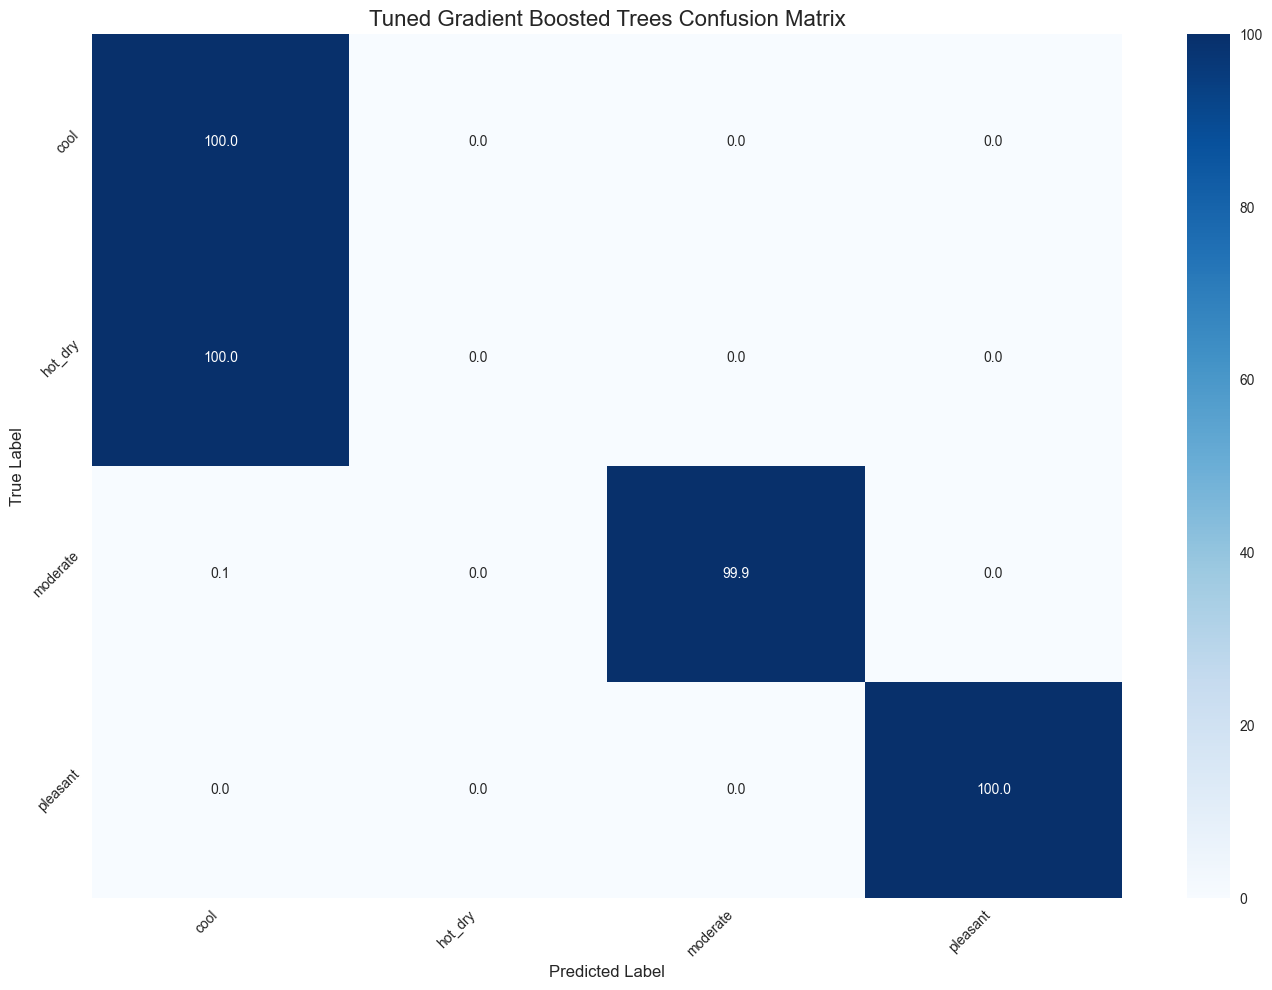


✅ Tuned model saved as checkpoint: G:\CSE Weather Model\models\checkpoints\tuned_gradient_boosted_trees.ydf

📊 Evaluating tuned model on validation set...
Debug: y_pred_raw type: <class 'numpy.ndarray'>
Debug: y_pred_raw shape: (103983, 4)
Debug: y_pred_raw dtype: float32
Debug: final y_pred shape: (103983,), dtype: int64
Debug: first 5 predictions: [3 3 2 2 2]
Debug: y_true shape: (103983,), dtype: int64
Debug: first 5 true labels: [3 3 2 2 2]

📊 Tuned Gradient Boosted Trees Performance:
  • Accuracy: 0.9991
  • Precision: 0.9987
  • Recall: 0.9991
  • F1 Score: 0.9989

📊 Comparing initial and tuned model performance:
                          Model  Accuracy  Precision  Recall  F1 Score
0        Gradient Boosted Trees     0.999      0.999   0.999     0.999
1  Tuned Gradient Boosted Trees     0.999      0.999   0.999     0.999

📊 Confusion Matrix for tuned model:
Debug: y_pred_raw type: <class 'numpy.ndarray'>
Debug: y_pred_raw shape: (103983, 4)
Debug: y_pred_raw dtype: float32
Debu

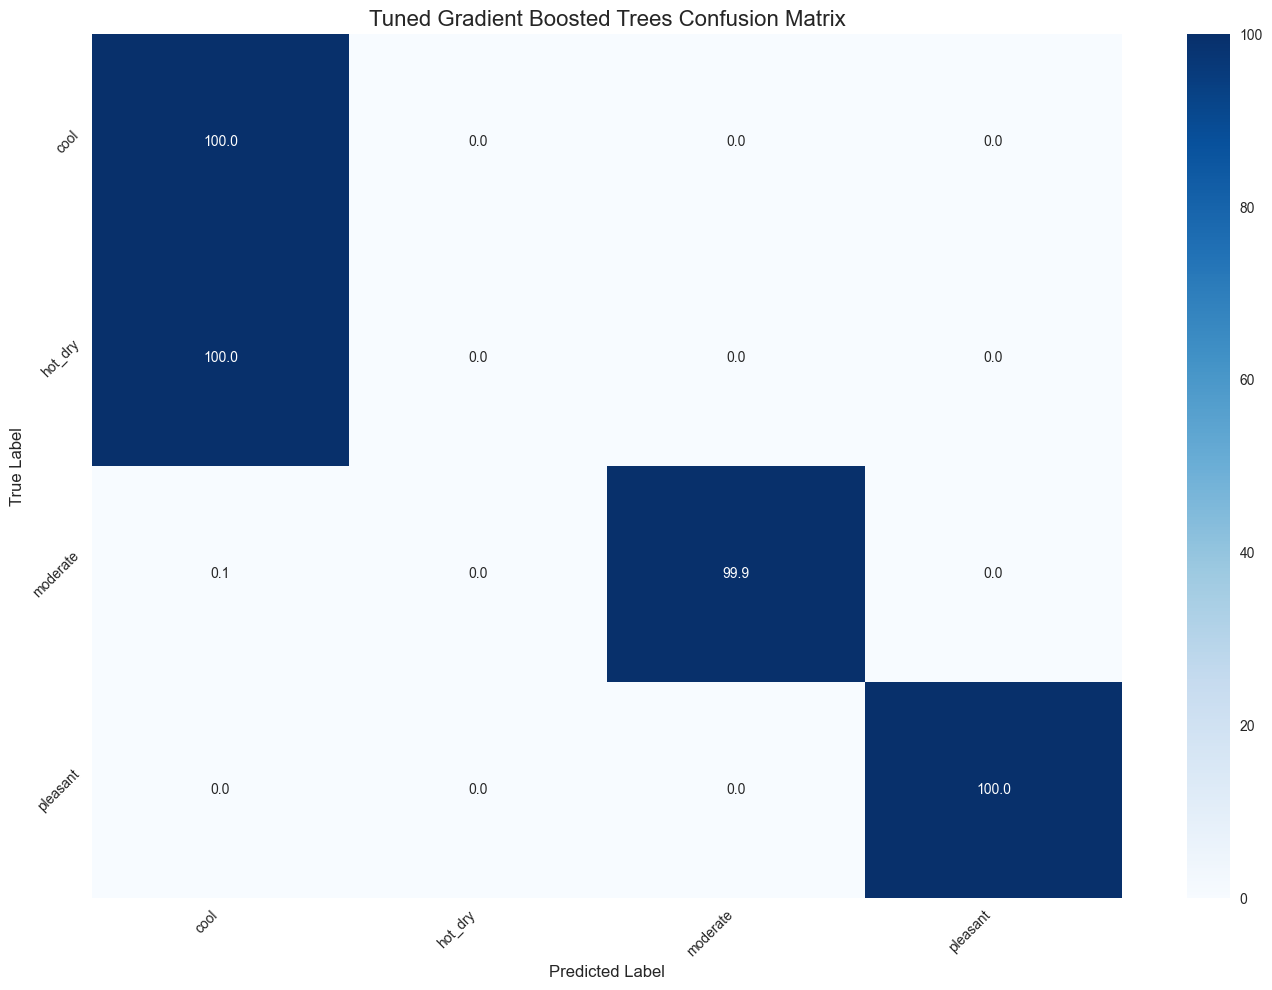


✅ Tuned model saved as checkpoint: G:\CSE Weather Model\models\checkpoints\tuned_gradient_boosted_trees.ydf


In [4]:
print("🔧 HYPERPARAMETER TUNING")
print("=" * 50)

print(f"\n🔍 Tuning hyperparameters for {best_model_name}...")

# Function to tune Random Forest hyperparameters
def tune_random_forest():
    """Tune hyperparameters for Random Forest model."""
    print("\n🛠️ Testing Random Forest configurations...")
    
    # Define parameter grid
    param_grid = [
        {'num_trees': 50, 'max_depth': 10, 'min_examples': 5},
        {'num_trees': 100, 'max_depth': 15, 'min_examples': 5},
        {'num_trees': 100, 'max_depth': 20, 'min_examples': 2},
        {'num_trees': 200, 'max_depth': 20, 'min_examples': 2},
        {'num_trees': 200, 'max_depth': 25, 'min_examples': 1}
    ]
    
    # Train and evaluate models with different parameters
    results = []
    for i, params in enumerate(param_grid):
        print(f"\n🔧 Testing configuration {i+1}/{len(param_grid)}: {params}")
        
        # Create learner with current parameters
        learner = RandomForestLearner(
            label=label,
            num_trees=params['num_trees'],
            max_depth=params['max_depth'],
            min_examples=params['min_examples'],
            categorical_algorithm="RANDOM",
            random_seed=42
        )
        
        # Train model
        start_time = datetime.now()
        # Create training dataframe with both features and label
        train_data = X_train.copy()
        train_data[label] = y_train
        model = learner.train(train_data)
        train_time = (datetime.now() - start_time).total_seconds()
        print(f"  ✓ Model trained in {train_time:.2f}s")
        
        # Evaluate on validation set
        val_data = X_val.copy()
        val_data[label] = y_val
        y_pred_raw = model.predict(val_data)
        
        # Debug: print the type and shape of predictions
        print(f"  Debug: y_pred_raw type: {type(y_pred_raw)}")
        if hasattr(y_pred_raw, 'shape'):
            print(f"  Debug: y_pred_raw shape: {y_pred_raw.shape}")
        
        # Convert predictions to proper format if needed
        # This ensures compatibility with sklearn metrics
        if isinstance(y_pred_raw, dict) and "predictions" in y_pred_raw:
            y_pred = y_pred_raw["predictions"]
        elif hasattr(y_pred_raw, 'values'):  # pandas Series/DataFrame
            y_pred = y_pred_raw.values
        elif hasattr(y_pred_raw, 'astype'):
            y_pred = y_pred_raw.astype(int)
        else:
            y_pred = np.array(y_pred_raw, dtype=int)
        
        # Ensure y_pred is 1D for multiclass classification
        y_pred = np.squeeze(y_pred)  # Remove single-dimensional entries
        if y_pred.ndim > 1:
            # If still multidimensional, take the first column or argmax
            if y_pred.shape[1] > 1:
                y_pred = np.argmax(y_pred, axis=1)
            else:
                y_pred = y_pred.flatten()
        
        # Ensure y_pred is the same length as y_true and correct type
        y_pred = np.array(y_pred, dtype=int)
        
        print(f"  Debug: final y_pred shape: {y_pred.shape}, first 3: {y_pred[:3]}")
        
        accuracy = accuracy_score(y_val, y_pred)
        
        # Store results
        results.append({
            'params': params,
            'accuracy': accuracy,
            'train_time': train_time,
            'model': model,
            'learner': learner
        })
        
        print(f"  📊 Validation accuracy: {accuracy:.4f}")
    
    # Find best configuration
    best_idx = max(range(len(results)), key=lambda i: results[i]['accuracy'])
    best_result = results[best_idx]
    
    print(f"\n✅ Best Random Forest configuration:")
    print(f"  • Parameters: {best_result['params']}")
    print(f"  • Validation accuracy: {best_result['accuracy']:.4f}")
    print(f"  • Training time: {best_result['train_time']:.2f}s")
    
    return best_result['model'], best_result['learner'], best_result['params']

# Function to tune Gradient Boosted Trees hyperparameters
def tune_gradient_boosted_trees():
    """Tune hyperparameters for Gradient Boosted Trees model."""
    print("\n🛠️ Testing Gradient Boosted Trees configurations...")
    
    # Define parameter grid
    param_grid = [
        {'num_trees': 50, 'max_depth': 4, 'shrinkage': 0.1},
        {'num_trees': 100, 'max_depth': 4, 'shrinkage': 0.1},
        {'num_trees': 100, 'max_depth': 6, 'shrinkage': 0.05},
        {'num_trees': 200, 'max_depth': 6, 'shrinkage': 0.05},
        {'num_trees': 200, 'max_depth': 8, 'shrinkage': 0.01}
    ]
    
    # Train and evaluate models with different parameters
    results = []
    for i, params in enumerate(param_grid):
        print(f"\n🔧 Testing configuration {i+1}/{len(param_grid)}: {params}")
        
        # Create learner with current parameters
        learner = GradientBoostedTreesLearner(
            label=label,
            num_trees=params['num_trees'],
            max_depth=params['max_depth'],
            shrinkage=params['shrinkage'],
            categorical_algorithm="RANDOM",
            random_seed=42
        )
        
        # Train model
        start_time = datetime.now()
        # Create training dataframe with both features and label
        train_data = X_train.copy()
        train_data[label] = y_train
        model = learner.train(train_data)
        train_time = (datetime.now() - start_time).total_seconds()
        print(f"  ✓ Model trained in {train_time:.2f}s")
        
        # Evaluate on validation set
        val_data = X_val.copy()
        val_data[label] = y_val
        y_pred_raw = model.predict(val_data)
        
        # Debug: print the type and shape of predictions
        print(f"  Debug: y_pred_raw type: {type(y_pred_raw)}")
        if hasattr(y_pred_raw, 'shape'):
            print(f"  Debug: y_pred_raw shape: {y_pred_raw.shape}")
        
        # Convert predictions to proper format if needed
        # This ensures compatibility with sklearn metrics
        if isinstance(y_pred_raw, dict) and "predictions" in y_pred_raw:
            y_pred = y_pred_raw["predictions"]
        elif hasattr(y_pred_raw, 'values'):  # pandas Series/DataFrame
            y_pred = y_pred_raw.values
        elif hasattr(y_pred_raw, 'astype'):
            y_pred = y_pred_raw.astype(int)
        else:
            y_pred = np.array(y_pred_raw, dtype=int)
        
        # Ensure y_pred is 1D for multiclass classification
        y_pred = np.squeeze(y_pred)  # Remove single-dimensional entries
        if y_pred.ndim > 1:
            # If still multidimensional, take the first column or argmax
            if y_pred.shape[1] > 1:
                y_pred = np.argmax(y_pred, axis=1)
            else:
                y_pred = y_pred.flatten()
        
        # Ensure y_pred is the same length as y_true and correct type
        y_pred = np.array(y_pred, dtype=int)
        
        print(f"  Debug: final y_pred shape: {y_pred.shape}, first 3: {y_pred[:3]}")
        
        accuracy = accuracy_score(y_val, y_pred)
        
        # Store results
        results.append({
            'params': params,
            'accuracy': accuracy,
            'train_time': train_time,
            'model': model,
            'learner': learner
        })
        
        print(f"  📊 Validation accuracy: {accuracy:.4f}")
    
    # Find best configuration
    best_idx = max(range(len(results)), key=lambda i: results[i]['accuracy'])
    best_result = results[best_idx]
    
    print(f"\n✅ Best Gradient Boosted Trees configuration:")
    print(f"  • Parameters: {best_result['params']}")
    print(f"  • Validation accuracy: {best_result['accuracy']:.4f}")
    print(f"  • Training time: {best_result['train_time']:.2f}s")
    
    return best_result['model'], best_result['learner'], best_result['params']

# Tune hyperparameters for the selected model
if best_model_name == "Random Forest":
    tuned_model, tuned_learner, best_params = tune_random_forest()
else:
    tuned_model, tuned_learner, best_params = tune_gradient_boosted_trees()

# Function to tune Random Forest hyperparameters
def tune_random_forest():
    """Tune hyperparameters for Random Forest model."""
    print("\n🛠️ Testing Random Forest configurations...")
    
    # Define parameter grid
    param_grid = [
        {'num_trees': 50, 'max_depth': 10, 'min_examples': 5},
        {'num_trees': 100, 'max_depth': 15, 'min_examples': 5},
        {'num_trees': 100, 'max_depth': 20, 'min_examples': 2},
        {'num_trees': 200, 'max_depth': 20, 'min_examples': 2},
        {'num_trees': 200, 'max_depth': 25, 'min_examples': 1}
    ]
    
    # Train and evaluate models with different parameters
    results = []
    for i, params in enumerate(param_grid):
        print(f"\n🔧 Testing configuration {i+1}/{len(param_grid)}: {params}")
        
        # Create learner with current parameters
        learner = RandomForestLearner(
            label=label,
            num_trees=params['num_trees'],
            max_depth=params['max_depth'],
            min_examples=params['min_examples'],
            categorical_algorithm="RANDOM",
            random_seed=42
        )
        
        # Train model
        start_time = datetime.now()
        # Create training dataframe with both features and label
        train_data = X_train.copy()
        train_data[label] = y_train
        model = learner.train(train_data)
        train_time = (datetime.now() - start_time).total_seconds()
        print(f"  ✓ Model trained in {train_time:.2f}s")
        
        # Evaluate on validation set
        val_data = X_val.copy()
        val_data[label] = y_val
        y_pred_raw = model.predict(val_data)
        
        # Debug: print the type and shape of predictions
        print(f"  Debug: y_pred_raw type: {type(y_pred_raw)}")
        if hasattr(y_pred_raw, 'shape'):
            print(f"  Debug: y_pred_raw shape: {y_pred_raw.shape}")
        
        # Convert predictions to proper format if needed
        # This ensures compatibility with sklearn metrics
        if isinstance(y_pred_raw, dict) and "predictions" in y_pred_raw:
            y_pred = y_pred_raw["predictions"]
        elif hasattr(y_pred_raw, 'values'):  # pandas Series/DataFrame
            y_pred = y_pred_raw.values
        elif hasattr(y_pred_raw, 'astype'):
            y_pred = y_pred_raw.astype(int)
        else:
            y_pred = np.array(y_pred_raw, dtype=int)
        
        # Ensure y_pred is 1D for multiclass classification
        y_pred = np.squeeze(y_pred)  # Remove single-dimensional entries
        if y_pred.ndim > 1:
            # If still multidimensional, take the first column or argmax
            if y_pred.shape[1] > 1:
                y_pred = np.argmax(y_pred, axis=1)
            else:
                y_pred = y_pred.flatten()
        
        # Ensure y_pred is the same length as y_true and correct type
        y_pred = np.array(y_pred, dtype=int)
        
        print(f"  Debug: final y_pred shape: {y_pred.shape}, first 3: {y_pred[:3]}")
        
        accuracy = accuracy_score(y_val, y_pred)
        
        # Store results
        results.append({
            'params': params,
            'accuracy': accuracy,
            'train_time': train_time,
            'model': model,
            'learner': learner
        })
        
        print(f"  📊 Validation accuracy: {accuracy:.4f}")
    
    # Find best configuration
    best_idx = max(range(len(results)), key=lambda i: results[i]['accuracy'])
    best_result = results[best_idx]
    
    print(f"\n✅ Best Random Forest configuration:")
    print(f"  • Parameters: {best_result['params']}")
    print(f"  • Validation accuracy: {best_result['accuracy']:.4f}")
    print(f"  • Training time: {best_result['train_time']:.2f}s")
    
    return best_result['model'], best_result['learner'], best_result['params']

# Function to tune Gradient Boosted Trees hyperparameters
def tune_gradient_boosted_trees():
    """Tune hyperparameters for Gradient Boosted Trees model."""
# Evaluate tuned model on validation set
print("\n📊 Evaluating tuned model on validation set...")
tuned_metrics = evaluate_model(tuned_model, X_val, y_val, f"Tuned {best_model_name}")

# Compare initial and tuned model performance
print("\n📊 Comparing initial and tuned model performance:")
comparison_df = pd.DataFrame({
    'Model': [best_model_name, f"Tuned {best_model_name}"],
    'Accuracy': [max(accuracies), tuned_metrics['accuracy']],
    'Precision': [precisions[best_model_index], tuned_metrics['precision']],
    'Recall': [recalls[best_model_index], tuned_metrics['recall']],
    'F1 Score': [f1_scores[best_model_index], tuned_metrics['f1_score']]
})
print(comparison_df)

# Plot confusion matrix for tuned model
print("\n📊 Confusion Matrix for tuned model:")
# Ensure predictions are in the correct format
tuned_predictions = tuned_metrics['predictions']
if not isinstance(tuned_predictions, np.ndarray):
    tuned_predictions = np.array(tuned_predictions, dtype=int)
plot_confusion_matrix(y_val, tuned_predictions, label_encoder.classes_,
                     f"Tuned {best_model_name} Confusion Matrix")

# Create a checkpoint for the tuned model
checkpoint_path = CHECKPOINTS_DIR / f"tuned_{best_model_name.lower().replace(' ', '_')}.ydf"
tuned_model.save(str(checkpoint_path))
print(f"\n✅ Tuned model saved as checkpoint: {checkpoint_path}")
print("\n📊 Evaluating tuned model on validation set...")
tuned_metrics = evaluate_model(tuned_model, X_val, y_val, f"Tuned {best_model_name}")

# Compare initial and tuned model performance
print("\n📊 Comparing initial and tuned model performance:")
comparison_df = pd.DataFrame({
    'Model': [best_model_name, f"Tuned {best_model_name}"],
    'Accuracy': [max(accuracies), tuned_metrics['accuracy']],
    'Precision': [precisions[best_model_index], tuned_metrics['precision']],
    'Recall': [recalls[best_model_index], tuned_metrics['recall']],
    'F1 Score': [f1_scores[best_model_index], tuned_metrics['f1_score']]
})
print(comparison_df)

# Plot confusion matrix for tuned model
print("\n📊 Confusion Matrix for tuned model:")
# Ensure predictions are in the correct format
tuned_predictions = tuned_metrics['predictions']
if not isinstance(tuned_predictions, np.ndarray):
    tuned_predictions = np.array(tuned_predictions, dtype=int)
plot_confusion_matrix(y_val, tuned_predictions, label_encoder.classes_,
                     f"Tuned {best_model_name} Confusion Matrix")

# Create a checkpoint for the tuned model
checkpoint_path = CHECKPOINTS_DIR / f"tuned_{best_model_name.lower().replace(' ', '_')}.ydf"
tuned_model.save(str(checkpoint_path))
print(f"\n✅ Tuned model saved as checkpoint: {checkpoint_path}")

## Section 5: Final Model Training

In this section, we'll train the final model on the combined training and validation data using the best hyperparameters, then evaluate it on the test set.

🏆 FINAL MODEL TRAINING

🔧 Combining training and validation data for final model training...
✓ Combined dataset size: 589,237 records

🛠️ Creating final learner with best hyperparameters...
✓ Best parameters: {'num_trees': 100, 'max_depth': 4, 'shrinkage': 0.1}

🏃‍♂️ Training final model on combined training and validation data...
✓ Combined dataset size: 589,237 records

🛠️ Creating final learner with best hyperparameters...
✓ Best parameters: {'num_trees': 100, 'max_depth': 4, 'shrinkage': 0.1}

🏃‍♂️ Training final model on combined training and validation data...
Train model on 589237 examples
Train model on 589237 examples
Model trained in 0:02:47.940800
Model trained in 0:02:47.940800
✓ Final model trained in 171.09s

📊 Evaluating final model on test set...
✓ Final model trained in 171.09s

📊 Evaluating final model on test set...
Debug: y_pred_raw type: <class 'numpy.ndarray'>
Debug: y_pred_raw shape: (103983, 4)
Debug: y_pred_raw dtype: float32
Debug: final y_pred shape: (103983,

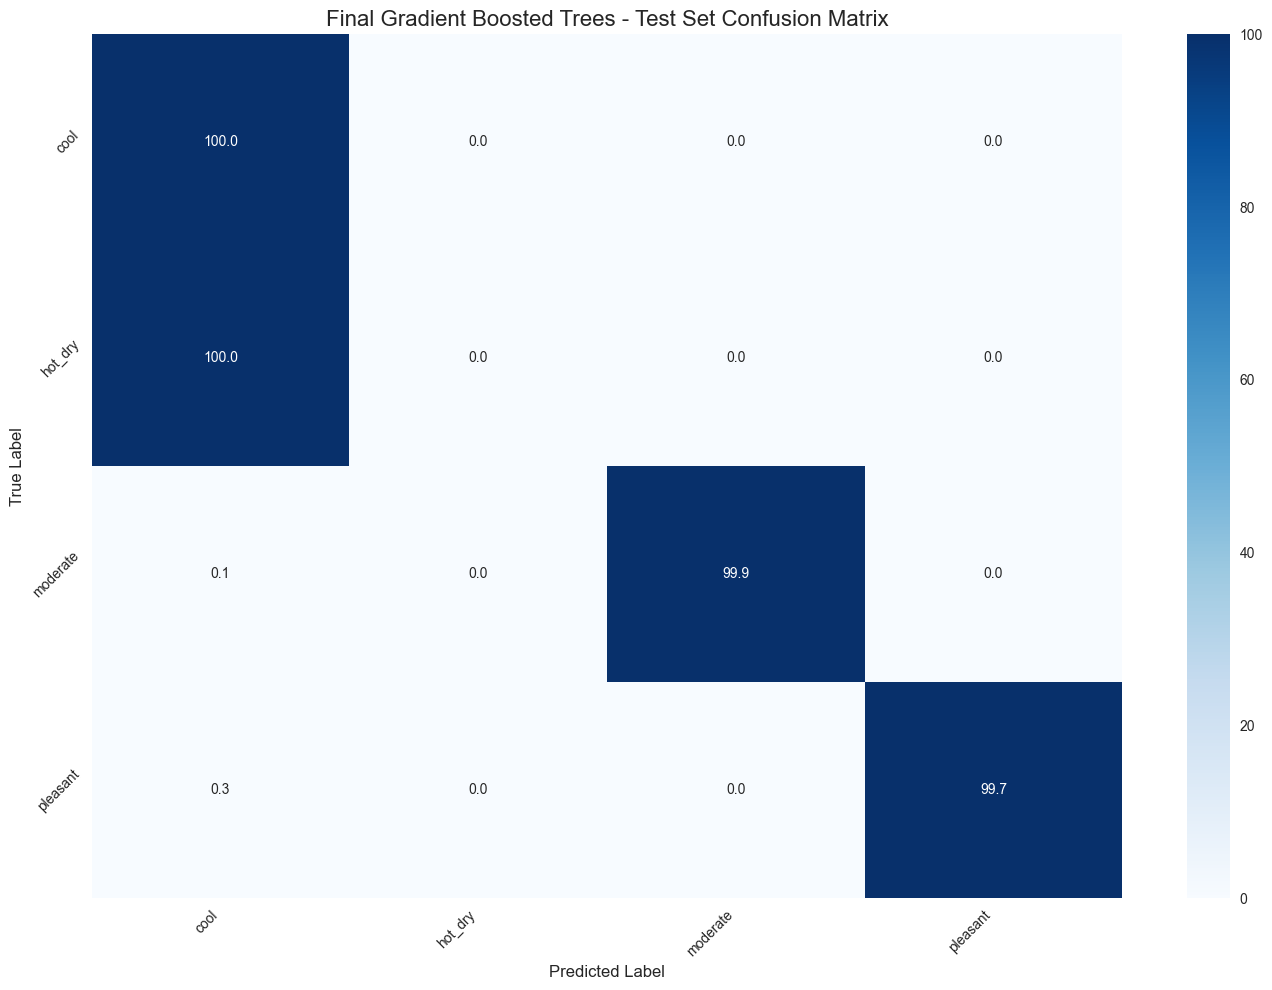


🔍 Found 223 misclassified examples out of 103983

📊 Sample of misclassified examples:

Example 55908:
  • True category: pleasant (label 3)
  • Predicted category: cool (label 0)
  • Feature values:
    - time: 2022-04-08 20:28:15
    - temperature: 0.3273
    - humidity: 0.5362
    - pressure: 0.0360
    - lux: 0.0000
    - heat_index: 0.3582
    - dew_point: 0.6515
    - comfort_ratio: 0.1473
    - pressure_trend: 0.3641
    - hour: 20
    - day: 8
    - month: 4
    - day_of_week: 4
    - is_weekend: 0.0000
    - hour_sin: 0.0670
    - hour_cos: 0.7500
    - absolute_humidity: 0.5667
    - air_density: 0.2226
    - light_category: 0

Example 38111:
  • True category: pleasant (label 3)
  • Predicted category: cool (label 0)
  • Feature values:
    - time: 2022-04-08 20:52:45
    - temperature: 0.3182
    - humidity: 0.5181
    - pressure: 0.0331
    - lux: 0.0000
    - heat_index: 0.3483
    - dew_point: 0.6296
    - comfort_ratio: 0.1467
    - pressure_trend: 0.4285
    - hour: 20

In [6]:
print("🏆 FINAL MODEL TRAINING")
print("=" * 50)

print("\n🔧 Combining training and validation data for final model training...")

# Combine training and validation data
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

print(f"✓ Combined dataset size: {len(X_train_val):,} records")

# Create final learner with the best hyperparameters
print("\n🛠️ Creating final learner with best hyperparameters...")
print(f"✓ Best parameters: {best_params}")

if best_model_name == "Random Forest":
    final_learner = RandomForestLearner(
        label=label,
        num_trees=best_params['num_trees'],
        max_depth=best_params['max_depth'],
        min_examples=best_params['min_examples'],
        categorical_algorithm="RANDOM",
        random_seed=42
    )
else:
    final_learner = GradientBoostedTreesLearner(
        label=label,
        num_trees=best_params['num_trees'],
        max_depth=best_params['max_depth'],
        shrinkage=best_params['shrinkage'],
        categorical_algorithm="RANDOM",
        random_seed=42
    )

# Train final model
print("\n🏃‍♂️ Training final model on combined training and validation data...")
start_time = datetime.now()
# Create combined training dataframe with both features and label
train_val_data = X_train_val.copy()
train_val_data[label] = y_train_val
final_model = final_learner.train(train_val_data)
final_train_time = (datetime.now() - start_time).total_seconds()
print(f"✓ Final model trained in {final_train_time:.2f}s")

# Evaluate final model on test set
print("\n📊 Evaluating final model on test set...")
final_metrics = evaluate_model(final_model, X_test, y_test, f"Final {best_model_name}")

# Show detailed classification report
y_pred_test = final_metrics['predictions']
# Ensure predictions are in the correct format
if not isinstance(y_pred_test, np.ndarray):
    y_pred_test = np.array(y_pred_test, dtype=int)
    
print("\n📊 Detailed Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test, target_names=weather_categories))

# Plot confusion matrix for final model on test set
print("\n📊 Confusion Matrix for final model on test set:")
plot_confusion_matrix(y_test, y_pred_test, weather_categories,
                     f"Final {best_model_name} - Test Set Confusion Matrix")

# Get misclassified examples
misclassified_indices = np.where(y_test != y_pred_test)[0]
print(f"\n🔍 Found {len(misclassified_indices)} misclassified examples out of {len(y_test)}")

# Show sample of misclassified examples if any exist
if len(misclassified_indices) > 0:
    print("\n📊 Sample of misclassified examples:")
    sample_size = min(5, len(misclassified_indices))
    sample_indices = np.random.choice(misclassified_indices, sample_size, replace=False)
    
    for idx in sample_indices:
        true_label = int(y_test.iloc[idx])
        pred_label = int(y_pred_test[idx])
        true_category = weather_categories[true_label]
        pred_category = weather_categories[pred_label]
        
        print(f"\nExample {idx}:")
        print(f"  • True category: {true_category} (label {true_label})")
        print(f"  • Predicted category: {pred_category} (label {pred_label})")
        print(f"  • Feature values:")
        for feature, value in X_test.iloc[idx].items():
            # Handle different data types for proper formatting
            if isinstance(value, (int, float)):
                print(f"    - {feature}: {value:.4f}")
            else:
                print(f"    - {feature}: {value}")

# Save the final model
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_name = best_model_name.lower().replace(' ', '_')
final_model_path = TRAINED_MODEL_DIR / f"weather_prediction_{model_name}_{timestamp}.ydf"

final_model.save(str(final_model_path))
print(f"\n✅ Final model saved to: {final_model_path}")

# Save model metadata
model_metadata = {
    "model_type": best_model_name,
    "parameters": best_params,
    "feature_count": len(feature_cols),
    "features": feature_cols,
    "class_count": len(weather_categories),
    "classes": weather_categories,
    "performance": {
        "accuracy": float(final_metrics['accuracy']),
        "precision": float(final_metrics['precision']),
        "recall": float(final_metrics['recall']),
        "f1_score": float(final_metrics['f1_score'])
    },
    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}

metadata_path = TRAINED_MODEL_DIR / f"weather_prediction_{model_name}_{timestamp}_metadata.json"
with open(metadata_path, 'w') as f:
    json.dump(model_metadata, f, indent=2)

print(f"✅ Model metadata saved to: {metadata_path}")

print("\n🎯 MODEL TRAINING SUMMARY")
print("=" * 50)
print(f"• Best model type: {best_model_name}")
print(f"• Best parameters: {best_params}")
print(f"• Test accuracy: {final_metrics['accuracy']:.4f}")
print(f"• Test precision: {final_metrics['precision']:.4f}")
print(f"• Test recall: {final_metrics['recall']:.4f}")
print(f"• Test F1 score: {final_metrics['f1_score']:.4f}")
print(f"• Final model saved to: {final_model_path}")

print("\n✅ Phase 5: Model Selection & Training completed successfully!")
